In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [4]:
df = transactions.merge(customers, on="CustomerID", how="left")
df = df.merge(products, on="ProductID", how="left")


In [5]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


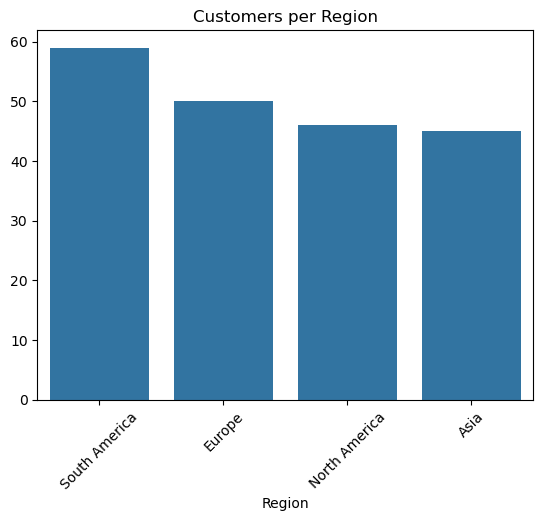

In [6]:
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Customers per Region")
plt.xticks(rotation=45)
plt.show()

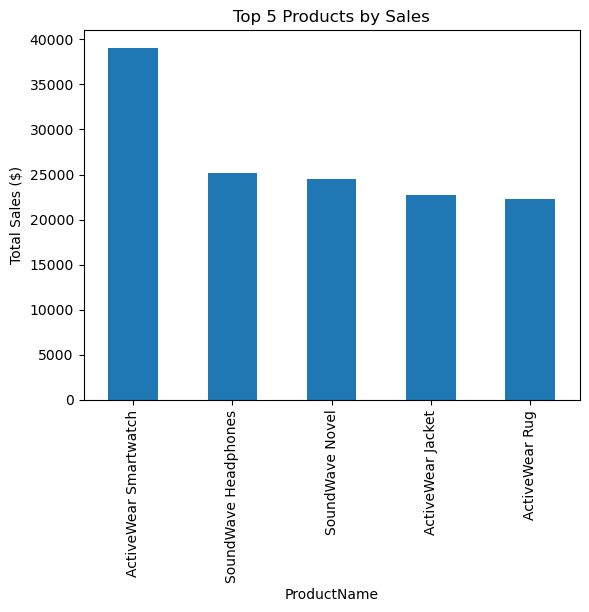

In [7]:
top_products = df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='bar', title='Top 5 Products by Sales')
plt.ylabel('Total Sales ($)')
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_19496\306098959.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('TransactionDate').resample('M')['TotalValue'].sum()


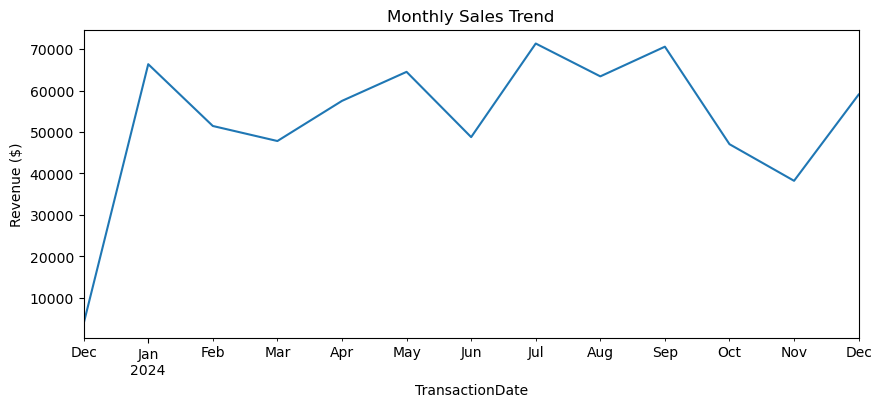

In [8]:
monthly_sales = df.set_index('TransactionDate').resample('M')['TotalValue'].sum()
monthly_sales.plot(title='Monthly Sales Trend', figsize=(10,4))
plt.ylabel('Revenue ($)')
plt.show()

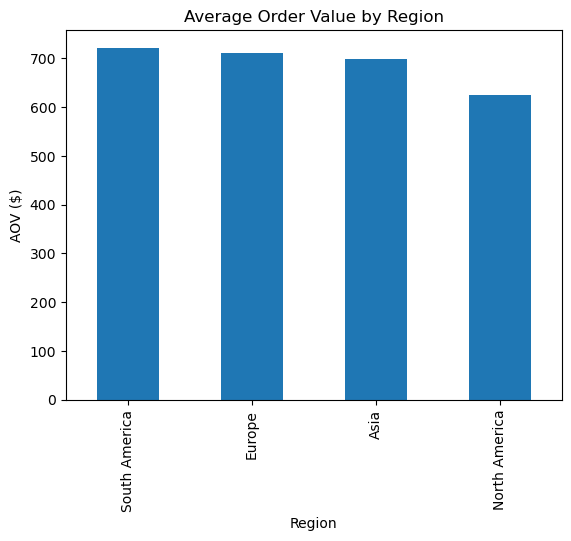

In [9]:
aov_region = df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
aov_region.plot(kind='bar', title='Average Order Value by Region')
plt.ylabel('AOV ($)')
plt.show()

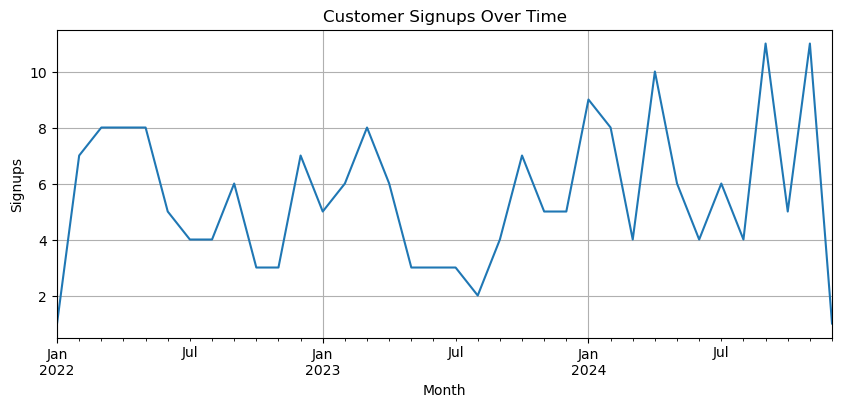

In [11]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trend = customers.set_index('SignupDate').resample('MS').size()
signup_trend.plot(title='Customer Signups Over Time', figsize=(10,4))
plt.ylabel('Signups')
plt.xlabel('Month')
plt.grid(True)
plt.show()